# Least Squares Tutorial

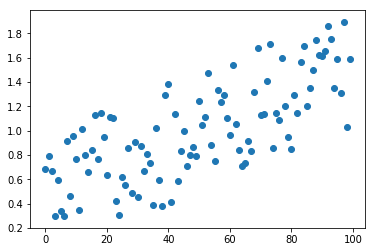

In [58]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.arange(n).flatten()

y = np.random.rand(n,1).flatten()
y = y + x*0.01
plt.scatter(x,y)

we need to define a line ($${ y = kx+b }$$) such that the error betwee each of its y-coordinate and the y-coordinate of the corresponding (lying on the same x-coordinate) data points (${y_i}$) is minimized. We will only care about absolute values of the errors, so we'll use the squares.
$${L(k,b) = \sum_{i}{(y_i - kx_i - b)^2}}$$
We need to find to differentiate (using the chain rule) this expression and set it to zero. That's where this loss (error) will be minimized.


$$\begin{cases} \frac{\partial L}{\partial k} = -2 \sum_{i}{(y_i - kx_i-b)*x_i = 0} \\ \frac{\partial L}{\partial b} = -2 \sum_{i}{(y_i - kx_i-b)*1} = 0 \end{cases}$$

Dropping the -2 and expading the brackets and the sums (for convenience), we have:

$$\begin{cases} \frac{\partial L}{\partial k} = \sum_{i}{y_ix_i} - k\sum_{i}{x_ix_i} - b\sum_{i}{x_i} = 0 \\ \frac{\partial L}{\partial b} = \sum_{i}{y_i} - k\sum_{i}{x_i}-b\sum_{i}{1} = 0 \end{cases}$$

The sigmas are in fact dot products. Let's rewrite the system of equations to get rid of the clutter:




Now solve for $k$ and for $b$


$$\begin{cases} \mathbf{y}^\top \mathbf{x} - k \mathbf{x}^\top \mathbf{x} = b\sum_{i}{x_i}\\
\sum_{i}{y_i} - k \sum_{x}{x_i} = bn \end{cases}$$

Now lets multiply both sides of the second equation in the system by $\frac{\sum_{i}{x_i}}{n}$

$$\begin{cases} \mathbf{y}^\top \mathbf{x} - k \mathbf{x}^\top \mathbf{x} = b\sum_{i}{x_i}\\
\sum_{i}{y_i}\frac{\sum_{i}{x_i}}{n} - k \sum_{x}{x_i}\frac{\sum_{i}{x_i}}{n} = bn\frac{\sum_{i}{x_i}}{n} \end{cases}$$

The right terms of both equations are now equal. We can subtract the secod from the first to get rid (temporarily) of the term containing the unknown variable $b$, and solve for $k$. Then we'll solve similarly for $b$.

In [59]:
a = np.sum(x)/n
k = (np.dot(y,x) - np.sum(y)*a)/(np.dot(x,x) - np.sum(x)*a)
print('k', k)
a = np.dot(x,x)/np.sum(x)
b = (np.dot(y,x) - np.sum(y)*a)/(np.sum(x) - n*a)
print('b', b)

k 0.009976582106771225
b 0.5178845090384154


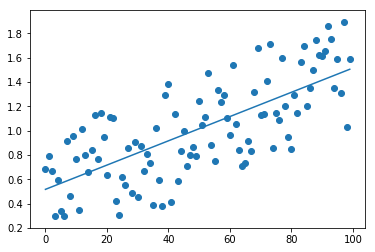

In [60]:
y_p = k*x + b
plt.scatter(x,y)
plt.plot(x,y_p)